In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# Any results you write to the current directory are saved as output.

['test', 'train', 'sample_submission.csv']


In [3]:
TRAIN_DIR = '../input/train/'
TEST_DIR = '../input/test/'

ROWS = 64
COLS = 64
CHANNELS = 3

train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [4]:
import random
cats=train_cats[:1000]
dogs=train_dogs[:1000]
train=cats+dogs
random.shuffle(train)
test =  test_images[:25]

In [5]:
a=cv2.imread(train[0])
rows = 64
col = 64
cha= 3

In [6]:
len(test)

25

In [7]:
def process(passs):
    count=len(passs)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)
    for i in range(len(passs)):
        a=cv2.imread(passs[i])
        a=cv2.resize(a,(rows,col))
        data[i]=a.T
    return data

In [8]:
data=process(train)
datat=process(test)
b=data[0][0]
b.shape

(64, 64)

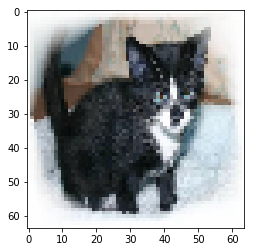

In [9]:
plt.imshow(data[0].T)

In [10]:
#by tensowflow
import tensorflow as tf

def process(image):
    images=[]
    a=tf.placeholder(dtype=tf.string)
    b=tf.read_file(a)
    c=tf.image.decode_jpeg(b)
    
    
    with tf.Session() as sess:
        for i in range(len(image)):
            images.append(sess.run(c,feed_dict={a:image[i]}))
    sess.close()
    return(images)

In [11]:
datat=process(test)

In [12]:
#neural network using tensorflow

In [13]:
data.shape

(2000, 3, 64, 64)

In [14]:
a=data[0]

In [15]:
b=a.T
b.shape

(64, 64, 3)

In [16]:
x=np.ndarray((2000,64,64,3),dtype=np.uint8)
x1=np.ndarray((25,64,64,3),dtype=np.uint8)
for i in range(len(train)):
    a=data[i]
    a=a.T
    x[i]=a
for i in range(len(test)):
    a=datat[i]
    a=a.T
    x1[i]=a
    

ValueError: could not broadcast input array from shape (3,500,430) into shape (64,64,3)

In [17]:
print(x.shape)
print(x1.shape)

(2000, 64, 64, 3)
(25, 64, 64, 3)


In [72]:
labels = []
for i in train:
    if 'dog' in i:
        labels.append(1)
    else:
        labels.append(0)

In [73]:

tf.reset_default_graph()

In [74]:
Xf = x.reshape(x.shape[0],-1).T
X1f = x1.reshape(x1.shape[0],-1).T

In [75]:
X1f.shape

(12288, 25)

In [76]:
X = tf.placeholder(tf.float32, [12288, None], name="X")
Y=  tf.placeholder(tf.float32,[1,None],name="Y")

In [77]:

tf.set_random_seed(1)
w1 = tf.get_variable("w1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
w2 = tf.get_variable("w2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
w3 = tf.get_variable("w3", [6,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())
w4 = tf.get_variable("w4", [1,6], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b4 = tf.get_variable("b4", [1,1], initializer = tf.zeros_initializer())

In [78]:
Z1 = tf.matmul(w1, X) + b1                                               # Z1 = np.dot(W1, X) + b1
A1 = tf.nn.relu(Z1)                                             # A1 = relu(Z1)
Z2 = tf.matmul(w2, A1) + b2                                              # Z2 = np.dot(W2, a1) + b2
A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
Z3 = tf.matmul(w3, A2) + b3
A3=tf.nn.relu(Z3)
Z4=tf.matmul(w4,A3) + b4
A4=tf.sigmoid(Z4)

In [79]:
logits = tf.transpose(A4)

    
    ### START CODE HERE ### (1 line of code)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))

In [80]:
 optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

In [81]:
init = tf.global_variables_initializer()

In [82]:
labels=np.array(labels)
labels=labels.reshape(2000,1)
labels=labels.T
with tf.Session() as sess:
        sess.run(init)
        for j in range(10):
            sess.run([cost,optimizer],feed_dict={X:Xf, Y:labels})
            if (i==20):
                print('20 done')    

InvalidArgumentError: Input to reshape is a tensor with 4000000 values, but the requested shape has 2000
	 [[node gradients/softmax_cross_entropy_with_logits_sg/Reshape_grad/Reshape (defined at <ipython-input-80-2f02ee52f8b0>:1)  = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](gradients/softmax_cross_entropy_with_logits_sg_grad/mul, gradients/softmax_cross_entropy_with_logits_sg/Reshape_grad/Shape)]]

Caused by op 'gradients/softmax_cross_entropy_with_logits_sg/Reshape_grad/Reshape', defined at:
  File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/opt/conda/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/opt/conda/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/opt/conda/lib/python3.6/asyncio/base_events.py", line 1434, in _run_once
    handle._run()
  File "/opt/conda/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/opt/conda/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-80-2f02ee52f8b0>", line 1, in <module>
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 400, in minimize
    grad_loss=grad_loss)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 519, in compute_gradients
    colocate_gradients_with_ops=colocate_gradients_with_ops)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 630, in gradients
    gate_gradients, aggregation_method, stop_gradients)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 814, in _GradientsHelper
    lambda: grad_fn(op, *out_grads))
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 408, in _MaybeCompile
    return grad_fn()  # Exit early
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 814, in <lambda>
    lambda: grad_fn(op, *out_grads))
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/array_grad.py", line 519, in _ReshapeGrad
    return [array_ops.reshape(grad, array_ops.shape(op.inputs[0])), None]
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 6482, in reshape
    "Reshape", tensor=tensor, shape=shape, name=name)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

...which was originally created as op 'softmax_cross_entropy_with_logits_sg/Reshape', defined at:
  File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
[elided 22 identical lines from previous traceback]
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-79-d68c02e0a2c0>", line 5, in <module>
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 306, in new_func
    return func(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 1954, in softmax_cross_entropy_with_logits
    labels=labels, logits=logits, dim=dim, name=name)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 1857, in softmax_cross_entropy_with_logits_v2
    precise_logits = _flatten_outer_dims(precise_logits)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 1612, in _flatten_outer_dims
    output = array_ops.reshape(logits, array_ops.concat([[-1], last_dim_size], 0))
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 6482, in reshape
    "Reshape", tensor=tensor, shape=shape, name=name)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Input to reshape is a tensor with 4000000 values, but the requested shape has 2000
	 [[node gradients/softmax_cross_entropy_with_logits_sg/Reshape_grad/Reshape (defined at <ipython-input-80-2f02ee52f8b0>:1)  = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](gradients/softmax_cross_entropy_with_logits_sg_grad/mul, gradients/softmax_cross_entropy_with_logits_sg/Reshape_grad/Shape)]]


In [83]:
print(labels.shape)
print(Y)
print(Xf.shape)
print(X)

(1, 2000)
Tensor("Y:0", shape=(1, ?), dtype=float32)
(12288, 2000)
Tensor("X:0", shape=(12288, ?), dtype=float32)


In [ ]:
q=Xf.T[0].reshape(12288,1)

In [ ]:
type(Xf)

In [76]:
w=np.array(labels[4])

In [81]:
q=w.reshape(1,1)

In [82]:
q.shape

(1, 1)